In [1]:
import os
import sys
import pandas as pd

sys.path.append("../src")
from pharmgkb import RawData

data_path = os.path.join("..", "data")
pharmgkb_path = os.path.join(data_path, "pharmgkb")
processed_path = os.path.join(data_path, "pharmgkb_processed")

In [4]:
r = RawData()
df = r.relationships

In [5]:
df_ = df[(df["Entity1_type"]=="Gene")&(df["Entity2_type"]=="Haplotype")]
print(len(df_))
df_ = df[(df["Entity1_type"]=="Haplotype")&(df["Entity2_type"]=="Gene")]
print(len(df_))

#TODO Manually revise why the 410 when deduplicated become 206 not 205

205
205


In [13]:
#Disease: checl disease explanations
r = RawData()
df = r.phenotypes
for x in df["Name"].tolist(): 
    type(x)
#All are strings, but some conditions are using a comma separation with extra "", for example_
print(df.loc[[9]])

  PharmGKB Accession Id                     Name  \
9              PA443225  Abnormalities, Multiple   

                                     Alternate Names Cross-references  \
9  Multiple Abnormalities,"Multiple congenital an...              NaN   

                                 External Vocabulary  
9  MeSH:D000015(Abnormalities, Multiple),"SnoMedC...  


In [14]:
df2 = pd.read_csv(os.path.join(processed_path, "disease.csv"))
print(len(df))
print(len(df2))

3586
3586


## PGX Relation Table

In [1]:
import pandas as pd
df = pd.read_csv("../data/pharmgkb_processed/pgx_relation.csv")
df.columns

Index(['aid', 'genomic_variation', 'vid', 'hid', 'gene', 'gid', 'chemical',
       'cid', 'pd_phenotype', 'pk_phenotype', 'evidence', 'association',
       'bid'],
      dtype='object')

In [12]:
print("Association IDs: "+str(len(set(df["aid"]))))
print("Genomic variation: "+str(len(set(df["genomic_variation"]))))
print("Variant IDs: "+str(len(set(df["vid"]))))
print("Haplotype IDs: "+str(len(set(df["hid"]))))
print("Gene IDs: "+str(len(set(df["gid"]))))
print("Chemical IDs: "+str(len(set(df["cid"]))))

Association IDs: 31878
Genomic variation: 7406
Variant IDs: 5858
Haplotype IDs: 197
Gene IDs: 1940
Chemical IDs: 770


<BarContainer object of 12 artists>

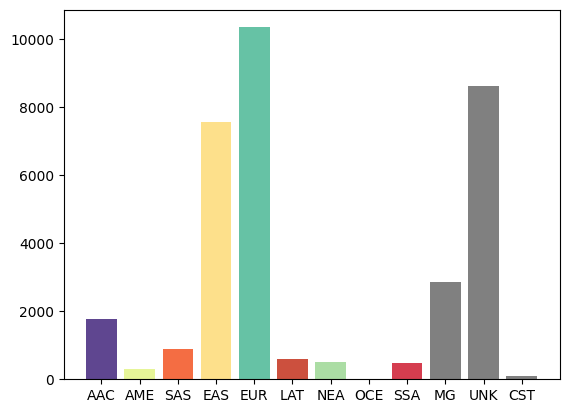

In [39]:
import matplotlib.pyplot as plt

bid = ["AAC","AME","SAS","EAS","EUR","LAT","NEA","OCE","SSA","MG","UNK","CST"]
counts = []

for b in bid:
    count = (df['bid'] == b).sum()
    counts += [count]

colors = ['#5F4690', '#E6F598', '#F46D43', '#FDE08B', '#66C2A5', '#CC503E', '#ABDDA4', '#3288BD', '#D53D4F', "#808080", "#808080", "#808080"]
fig, ax = plt.subplots()
ax.bar(bid, counts, color=colors)

<BarContainer object of 14 artists>

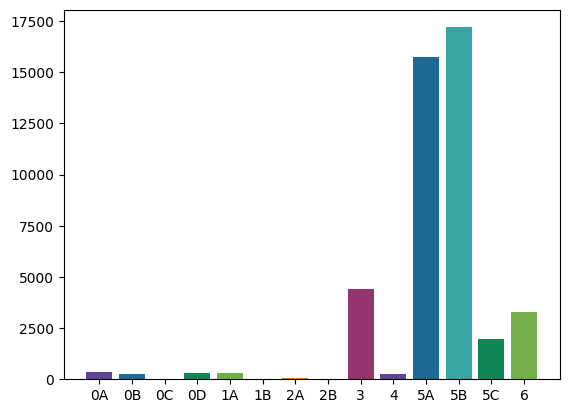

In [50]:
ev = df["evidence"].unique().tolist()
counts = []
for e in sorted(ev):
    count = (df['evidence'] == e).sum()
    counts += [count]

colors = ['#5F4690', '#1D6996', '#38A6A5', '#0F8554', '#73AF48', '#EDAD08', '#E17C05', '#CC503E', '#94346E']
fig, ax = plt.subplots()
ax.bar(sorted(ev), counts, color=colors)

In [52]:
#most abundant genes
counts = df["gene"].value_counts()
print(counts[:20])

#most abundant compounds

counts = df["chemical"].value_counts()
print(counts[:20])

gene
ABCB1      2202
CYP2D6     2195
CYP2C19    2126
CYP2C9     1525
CYP3A5     1353
OPRM1      1286
HLA-B       887
DPYD        871
CYP2B6      837
CYP3A4      835
SLCO1B1     773
UGT1A1      608
VKORC1      602
RYR1        548
COMT        512
MTHFR       446
DRD2        414
ABCC2       407
ABCG2       403
TPMT        392
Name: count, dtype: int64
chemical
warfarin          1630
tacrolimus        1570
methotrexate      1295
clopidogrel       1138
fluorouracil       921
nicotine           854
ethanol            815
opioids            719
methadone          671
risperidone        559
efavirenz          557
carbamazepine      549
heroin             511
irinotecan         474
morphine           473
tamoxifen          470
ribavirin          449
gemcitabine        425
antipsychotics     420
imatinib           409
Name: count, dtype: int64
